## COVID-19 Data Visualization using Python

Data Visualization is the first step towards getting an insight into a large data set in every data science project. Once the data has been acquired and preprocessed (cleaned and de-duplicated) we satrt with the next step of Data Science's **Exploratory Data Analysis** which kicks off with visualization of the data. The aim here is to extract useful insights and patterns from the raw data.

I have used Python and its few powerful libraries to achieve the task.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ### for plotting the data on world map
import warnings
warnings.filterwarnings('ignore')

In [4]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-25-2020.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3012 non-null   float64
 1   Admin2          3011 non-null   object 
 2   Province_State  3265 non-null   object 
 3   Country_Region  3450 non-null   object 
 4   Last_Update     3450 non-null   object 
 5   Lat             3378 non-null   float64
 6   Long_           3378 non-null   float64
 7   Confirmed       3450 non-null   int64  
 8   Deaths          3450 non-null   int64  
 9   Recovered       3450 non-null   int64  
 10  Active          3450 non-null   int64  
 11  Combined_Key    3450 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 323.6+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-26 02:32:35,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-26 02:32:35,30.295065,-92.414197,299,18,0,281,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-26 02:32:35,37.767072,-75.632346,731,11,0,720,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-26 02:32:35,43.452658,-116.241552,796,23,0,773,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-26 02:32:35,41.330756,-94.471059,8,0,0,8,"Adair, Iowa, US"


We have our data loaded and ready for use as a Pandas Dataframe (*df*), ***df.info()***  display the information about the data (metadata) i.e., a total of 3450 rows of data and 12 columns. Also, the ***df.head()*** previews the first five rows.

### Preprocessing the data

Now since our data has loaded successfully, we preprocess the data before using it for plotting. It will include :

* Removing superfluous columns like ‘FIPS’, ‘Admin2', ‘Last_Update’ (since all the data is for single-day — 25th May).
* Removing columns ‘Province_State’ and ‘Combined_Key’ since statewide data is not available for all the countries.
* Grouping together data by ‘Country_Region’ and rename the column to just ‘Country’

In [5]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,US,34.223334,-82.461707,35,0,0,35
1,US,30.295065,-92.414197,299,18,0,281
2,US,37.767072,-75.632346,731,11,0,720
3,US,43.452658,-116.241552,796,23,0,773
4,US,41.330756,-94.471059,8,0,0,8


The data can be grouped together by the ‘groupby’ function of the dataframe(df). It is similar to the GROUPBY statement as in SQL.

In [6]:
world = df.groupby("Country")[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
world.head()

,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,11180,9860,1097,223
1,Albania,1004,177,795,32
2,Algeria,8503,3147,4747,609
3,Andorra,763,49,663,51
4,Angola,70,48,18,4


Finally our data is cleaned and ready to use.

### Plotting the top 20 countries with the maximum number of confirmed cases

In [7]:
### Find top 20 countries with maximum number of confirmed cases
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)
top_20

,Country,Confirmed,Active,Recovered,Deaths
183,US,1659237,1565564,379157,98720
24,Brazil,378840,351425,153833,23590
145,Russia,353427,230996,118798,3633
187,United Kingdom,262542,224393,1161,51031
164,Spain,235400,208566,150376,26834
86,Italy,230158,55300,141981,32877
63,France,184584,90806,65317,28461
67,Germany,180241,11092,161199,8257
181,Turkey,157814,33430,120015,4369
80,India,144950,80072,60706,4172


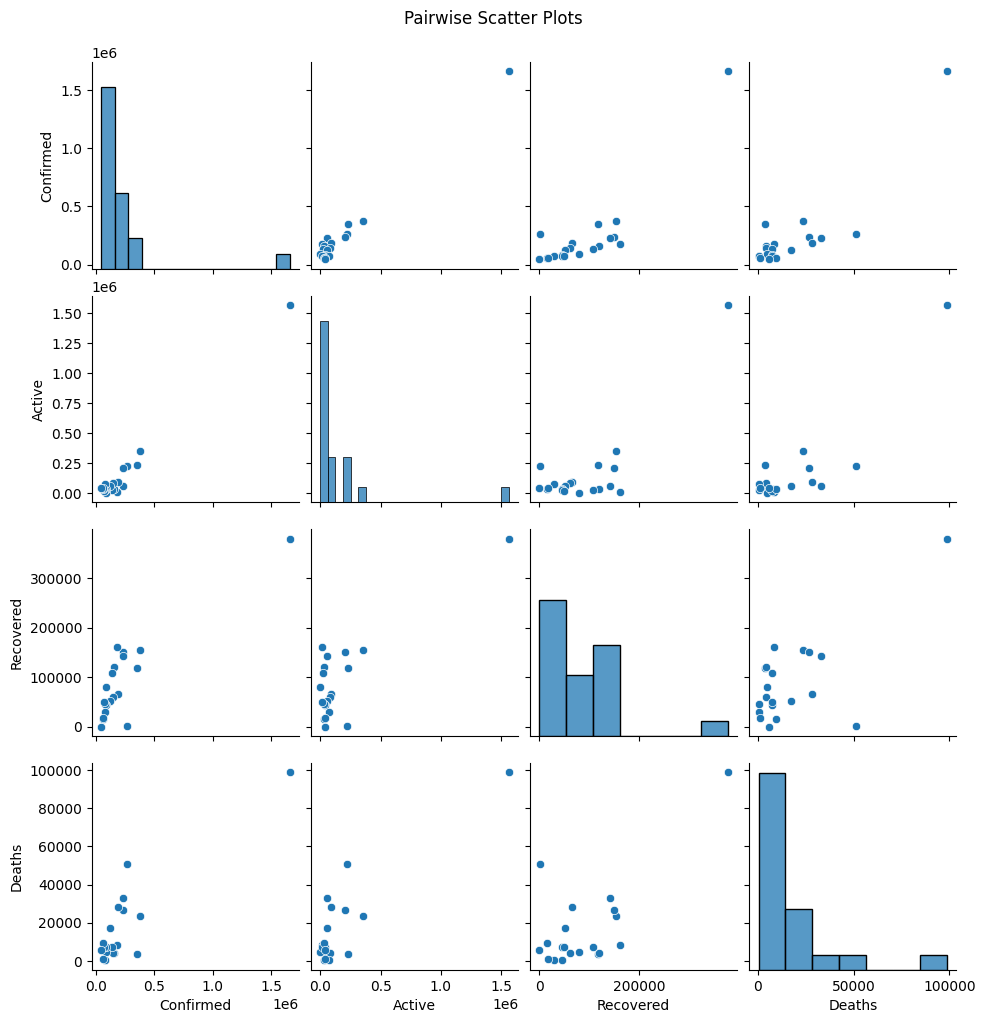

In [8]:
# Scatter plots for pairs of numerical columns
sns.pairplot(top_20[['Confirmed', 'Active', 'Recovered', 'Deaths']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()


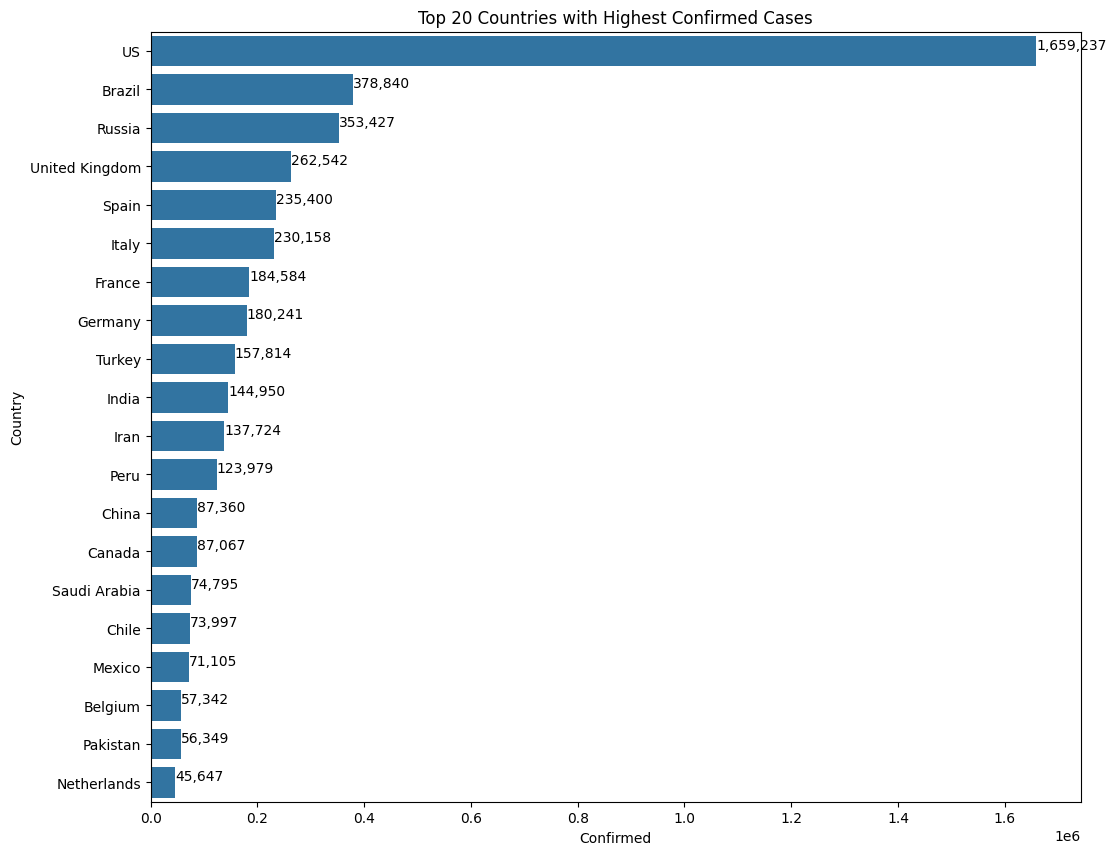

In [9]:
###  Barplot for the hghest confirmed cases in the world(top 20)
plt.figure(figsize=(12,10))
plot = sns.barplot(x='Confirmed', y='Country', data=top_20)
plt.title('Top 20 Countries with Highest Confirmed Cases')
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

#### Plotting Confirmed and Active cases for the top 5 countries with the maximum number of confirmed cases

In [10]:
# top_5 dataframe
top_5 = world.sort_values(by=['Confirmed'], ascending=False).head()
top_5

,Country,Confirmed,Active,Recovered,Deaths
183,US,1659237,1565564,379157,98720
24,Brazil,378840,351425,153833,23590
145,Russia,353427,230996,118798,3633
187,United Kingdom,262542,224393,1161,51031
164,Spain,235400,208566,150376,26834


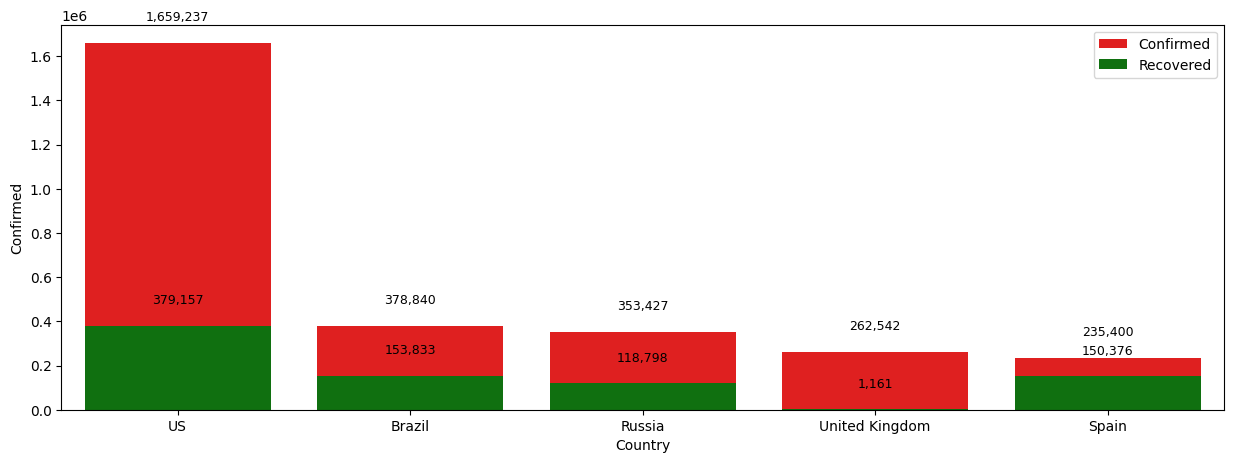

In [11]:
### Generate a Barplot
plt.figure(figsize=(15,5))
confirmed = sns.barplot(x='Country', y='Confirmed', data=top_5, color = 'red', label='Confirmed') # Pass data using the data parameter
recovered = sns.barplot(x='Country', y='Recovered', data=top_5, color = 'green', label='Recovered')
### Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_5['Confirmed'],top_5['Country'])):
    confirmed.text(i, value + 100000, f'{value:,.0f}',size=9, ha='center') # Adjust text position
for i,(value,name) in enumerate(zip(top_5['Recovered'],top_5['Country'])):
    recovered.text(i, value + 100000, f'{value:,.0f}',size=9, ha='center') # Adjust text position
plt.legend(loc=1)
plt.show()

#### Plotting a Choropleth map on World Map

A choropleth map is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income.

It provides an easy way to visualize how the measurement varies across a geographic area or show the level of variability within a region.

In [12]:
figure = px.choropleth(world,locations='Country', locationmode='country names', color='Confirmed', hover_name='Country', color_continuous_scale='tealgrn', range_color=[1,1000000],title='Countries with Confirmed cases')
figure.show()